####1팀 최종 모델

#### 데이터 (라이브러리) 로드 

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


Mounted at /content/drive


In [ ]:
train_x = np.load("/content/drive/My Drive/parrot/2nd/simpson_train_x_200.npy")
train_y = np.load("/content/drive/My Drive/parrot/2nd/simpson_train_y_200.npy")
num_classes = train_y.shape[1]
print(train_x.shape)
print(train_y.shape)
print(num_classes)
size = train_x.shape[1]
print(size)

(11248, 200, 200, 3)
(11248, 9)
9
200


In [ ]:
class_names = ['bart', 'charles_montgomery', 'krusty', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state=1)

In [ ]:
def draw_data(data, axis = 5): # axis = 5 => 5*5 프레임 만들어서 프린트하겠다. 
    len_data = len(data)
    size = axis**2
    random_int = np.random.randint(low=0, high=len_data, size=size)
    for i in range(0,size):
        plt.subplot(axis,axis,i+1)
        plt.imshow(data[i], cmap=plt.get_cmap('Purples'))

    plt.show()

In [ ]:
draw_data(train_x, 3)

In [ ]:
print(train_y[0:9])

In [ ]:
def acc_loss_plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc = 'upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

####ResNet152V2

- Adam 
- drop out = 0.4 
- learning rate : 1e-4
- epoch 30  

In [ ]:
from tensorflow.keras.applications import ResNet152V2

In [ ]:
dropout_rate = 0.4
learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
def build_model(num_classes):

    inputs = layers.Input(shape=(size, size, 3))
    model = ResNet152V2(include_top=False, weights="imagenet")
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    dropout = dropout_rate
    x = layers.Dropout(dropout, name="top_dropout")(x)
    output = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    model = Model(inputs = model.input, outputs = output)

    return model

model_Res152 = build_model(num_classes)

model_Res152.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_Res152.summary()

234553344/234545216 [==============================] - 2s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
____________________

In [ ]:
hist_Res152 = model_Res152.fit(train_x, train_y, batch_size = 32, epochs = 30, verbose=1, validation_data=(val_x, val_y))


Epoch 1/30
282/282 [==============================] - 110s 391ms/step - loss: 0.4886 - accuracy: 0.8547 - val_loss: 0.1637 - val_accuracy: 0.9529
Epoch 2/30
282/282 [==============================] - 107s 381ms/step - loss: 0.0850 - accuracy: 0.9750 - val_loss: 0.1314 - val_accuracy: 0.9662
Epoch 3/30
282/282 [==============================] - 107s 381ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.1105 - val_accuracy: 0.9702
Epoch 4/30
282/282 [==============================] - 107s 380ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.1240 - val_accuracy: 0.9724
Epoch 5/30
282/282 [==============================] - 107s 380ms/step - loss: 0.0563 - accuracy: 0.9832 - val_loss: 0.4773 - val_accuracy: 0.8942
Epoch 6/30
282/282 [==============================] - 107s 381ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.1423 - val_accuracy: 0.9693
Epoch 7/30
282/282 [==============================] - 107s 381ms/step - loss: 0.0550 - accuracy: 0.9843 - val_loss: 0.1326 -

cnn hist_Res152 fitting


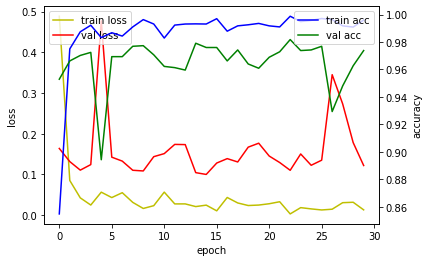

In [ ]:
print("cnn hist_Res152 fitting")
acc_loss_plot(hist_Res152)

In [ ]:
model_Res152.save('/content/drive/My Drive/parrot/2nd/model/ensemble_model_Res152_200.h5')

####xception

- Adam 
- drop out = 0.4 
- learning rate : 1e-4
- epoch 30  

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
dropout_rate = 0.4
learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
def build_model(num_classes):

    inputs = layers.Input(shape=(size, size, 3))
    model = Xception(include_top=False, weights="imagenet")
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    dropout = dropout_rate
    x = layers.Dropout(dropout, name="top_dropout")(x)
    output = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    model = Model(inputs = model.input, outputs = output)

    return model

model_xception1 = build_model(num_classes)

model_xception1.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_xception1.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_15[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [ ]:
hist_xception = model_xception1.fit(train_x, train_y, batch_size = 32, epochs = 30, verbose=1, validation_data=(val_x, val_y))


Epoch 1/30
282/282 [==============================] - 100s 355ms/step - loss: 0.6106 - accuracy: 0.8225 - val_loss: 0.1430 - val_accuracy: 0.9600
Epoch 2/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.1086 - val_accuracy: 0.9693
Epoch 3/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.1093 - val_accuracy: 0.9742
Epoch 4/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.1064 - val_accuracy: 0.9751
Epoch 5/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.1170 - val_accuracy: 0.9733
Epoch 6/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1258 - val_accuracy: 0.9724
Epoch 7/30
282/282 [==============================] - 99s 351ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.1421 - val_a

cnn hist_xception fitting


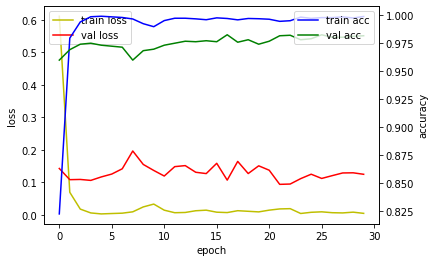

In [ ]:
print("cnn hist_xception fitting")
acc_loss_plot(hist_xception)

In [ ]:
model_xception1.save('/content/drive/My Drive/parrot/2nd/model/ensemble_model_xception_200.h5')

####Inception

- Adam 
- drop out = 0.4 
- learning rate : 1e-4
- epoch 30  

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
dropout_rate = 0.4
learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
def build_model(num_classes):

    inputs = layers.Input(shape=(size, size, 3))
    model = InceptionV3(include_top=False, weights="imagenet")
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    dropout = dropout_rate
    x = layers.Dropout(dropout, name="top_dropout")(x)
    output = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    model = Model(inputs = model.input, outputs = output)

    return model

model_Incep = build_model(num_classes)

model_Incep.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_Incep.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, None, None, 3 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization_6[0][0]      
______________________

In [ ]:
hist_Incep = model_Incep.fit(train_x, train_y, batch_size = 32, epochs = 30, verbose=1, validation_data = (val_x, val_y))


Epoch 1/30
282/282 [==============================] - 39s 137ms/step - loss: 0.6714 - accuracy: 0.8007 - val_loss: 0.1954 - val_accuracy: 0.9431
Epoch 2/30
282/282 [==============================] - 37s 131ms/step - loss: 0.1027 - accuracy: 0.9690 - val_loss: 0.1610 - val_accuracy: 0.9556
Epoch 3/30
282/282 [==============================] - 37s 131ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.1655 - val_accuracy: 0.9564
Epoch 4/30
282/282 [==============================] - 37s 131ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.1884 - val_accuracy: 0.9573
Epoch 5/30
282/282 [==============================] - 37s 132ms/step - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.1841 - val_accuracy: 0.9600
Epoch 6/30
282/282 [==============================] - 37s 131ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.1558 - val_accuracy: 0.9613
Epoch 7/30
282/282 [==============================] - 37s 131ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.2053 - val_ac

cnn hist_Incep fitting


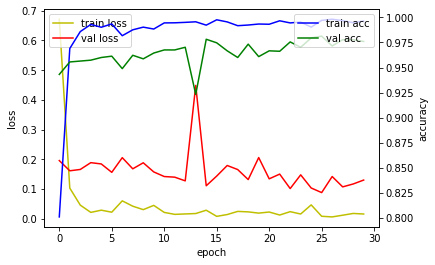

In [ ]:
print("cnn hist_Incep fitting")
acc_loss_plot(hist_Incep)

In [ ]:
model_Incep.save('/content/drive/My Drive/parrot/2nd/model/ensemble_model_Incep_200.h5')

####Densenet

- RMSprop 
- drop out = 0.2 
- learning rate : 1e-4
- epoch 30  

In [ ]:
from tensorflow.keras.applications import DenseNet201

In [ ]:
dropout_rate = 0.2
learning_rate = 1e-4
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

In [ ]:
def build_model(num_classes):

    inputs = layers.Input(shape=(size, size, 3))
    model = DenseNet201(include_top=False, weights="imagenet")
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    dropout = dropout_rate
    x = layers.Dropout(dropout, name="top_dropout")(x)
    output = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    model = Model(inputs = model.input, outputs = output)

    return model

model_dense201 = build_model(num_classes)

model_dense201.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_dense201.summary()

74842112/74836368 [==============================] - 1s 0us/step
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________

In [ ]:
hist_dense201 = model_dense201.fit(train_x, train_y, batch_size = 32, epochs = 30, verbose=1, validation_data = (val_x, val_y))


Epoch 1/30
282/282 [==============================] - 85s 302ms/step - loss: 0.1942 - accuracy: 0.9438 - val_loss: 0.1116 - val_accuracy: 0.9707
Epoch 2/30
282/282 [==============================] - 81s 287ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.1927 - val_accuracy: 0.9573
Epoch 3/30
282/282 [==============================] - 81s 287ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0988 - val_accuracy: 0.9800
Epoch 4/30
282/282 [==============================] - 81s 287ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.1637 - val_accuracy: 0.9698
Epoch 5/30
282/282 [==============================] - 81s 287ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0812 - val_accuracy: 0.9831
Epoch 6/30
282/282 [==============================] - 81s 287ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.1320 - val_accuracy: 0.9778
Epoch 7/30
282/282 [==============================] - 81s 286ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.1979 - val_ac

cnn hist_dense201 fitting


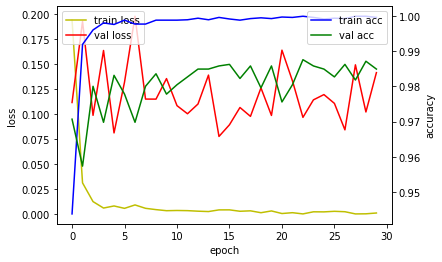

In [ ]:
print("cnn hist_dense201 fitting")
acc_loss_plot(hist_dense201)

In [ ]:
model_dense201.save('/content/drive/My Drive/parrot/2nd/model/ensemble_model_dense201_200.h5')

#### VGG16

- RMSprop 
- drop out = 0.4 
- learning rate : 1e-4
- epoch 50  

In [ ]:
dropout_rate = 0.4 
learning_rate = 1e-4
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
from tensorflow.keras.applications import VGG16

In [ ]:
def build_model(num_classes):

    inputs = layers.Input(shape=(size, size, 3))
    model = VGG16(include_top=False, weights="imagenet")
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    dropout = dropout_rate
    x = layers.Dropout(dropout, name="top_dropout")(x)
    output = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    model = Model(inputs = model.input, outputs = output)

    return model

model_vgg_1 = build_model(num_classes)

for layer in model_vgg_1.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model_vgg_1.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

model_vgg_1.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_______________________________________________________

In [ ]:
#hist_vgg_1 = model_vgg_1.fit(train_x, train_y, batch_size = 32, epochs = 30, verbose=1, validation_data=(val_x, val_y))

hist_vgg_1 = model_vgg_1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs = 30, batch_size=32, verbose=1)

Epoch 1/30
282/282 [==============================] - 56s 197ms/step - loss: 0.7131 - accuracy: 0.7639 - val_loss: 1.3835 - val_accuracy: 0.6324
Epoch 2/30
282/282 [==============================] - 55s 194ms/step - loss: 0.1904 - accuracy: 0.9410 - val_loss: 0.7150 - val_accuracy: 0.8471
Epoch 3/30
282/282 [==============================] - 55s 194ms/step - loss: 0.1267 - accuracy: 0.9628 - val_loss: 1.0139 - val_accuracy: 0.7831
Epoch 4/30
282/282 [==============================] - 55s 194ms/step - loss: 0.0852 - accuracy: 0.9749 - val_loss: 0.8621 - val_accuracy: 0.8329
Epoch 5/30
282/282 [==============================] - 55s 194ms/step - loss: 0.0664 - accuracy: 0.9808 - val_loss: 0.3180 - val_accuracy: 0.9156
Epoch 6/30
282/282 [==============================] - 55s 194ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.3220 - val_accuracy: 0.9169
Epoch 7/30
282/282 [==============================] - 55s 194ms/step - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.1230 - val_ac

cnn vgg16 model_vgg_1 fitting


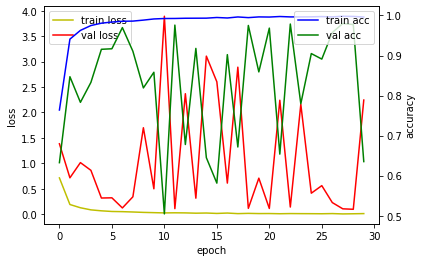

In [ ]:
print("cnn vgg16 model_vgg_1 fitting")
acc_loss_plot(hist_vgg_1)

In [ ]:
hist_vgg_2 = model_vgg_1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs = 20, batch_size=32, verbose=1)

Epoch 1/20
282/282 [==============================] - 55s 194ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.2122 - val_accuracy: 0.9520
Epoch 2/20
282/282 [==============================] - 55s 194ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.2077 - val_accuracy: 0.9644
Epoch 3/20
282/282 [==============================] - 55s 193ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1024 - val_accuracy: 0.9769
Epoch 4/20
282/282 [==============================] - 55s 193ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.2071 - val_accuracy: 0.9547
Epoch 5/20
282/282 [==============================] - 55s 194ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.3572 - val_accuracy: 0.9431
Epoch 6/20
282/282 [==============================] - 55s 194ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.6062 - val_accuracy: 0.8969
Epoch 7/20
282/282 [==============================] - 55s 194ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.1154 - val_ac

cnn vgg16 model_vgg_1 fitting


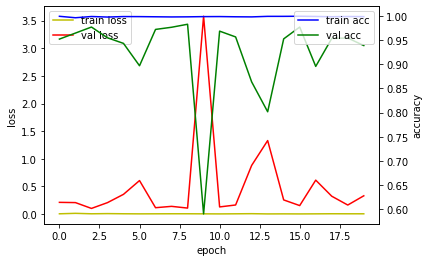

In [ ]:
print("cnn vgg16 model_vgg_1 fitting")
acc_loss_plot(hist_vgg_2)

In [ ]:
model_vgg_1.save('/content/drive/My Drive/parrot/2nd/model/ensemble_model_vgg16_200.h5')

#### ensemble model load

In [ ]:
from keras.models import load_model

In [ ]:
models = list()

model = load_model('/content/drive/MyDrive/parrot/2nd/model/ensemble/ensemble_model_Incep_200.h5')
models.append(model)
model = load_model('/content/drive/MyDrive/parrot/2nd/model/ensemble/ensemble_model_Res152_200.h5')
models.append(model)
model = load_model('/content/drive/MyDrive/parrot/2nd/model/ensemble/ensemble_model_dense201_200.h5')
models.append(model)
model = load_model('/content/drive/MyDrive/parrot/2nd/model/ensemble/ensemble_model_vgg16_200.h5')
models.append(model)
model = load_model('/content/drive/MyDrive/parrot/2nd/model/ensemble/ensemble_model_xception_200.h5')
models.append(model)


## test answer 저장



In [ ]:
import pandas as pd

test_list = pd.read_csv("/content/drive/My Drive/parrot/2nd/test_sample.csv")
print(type(test_list))

length = test_list.shape[0]
print(length)

test_list

<class 'pandas.core.frame.DataFrame'>
1086


,Unnamed: 0,files,pred
0,0,test10013.jpg,
1,1,test10019.jpg,
2,2,test10028.jpg,
3,3,test10074.jpg,
4,4,test10084.jpg,
...,...,...,...
1081,1081,test29955.jpg,
1082,1082,test29959.jpg,
1083,1083,test29963.jpg,
1084,1084,test29984.jpg,


In [ ]:

import cv2

for i in range(length):
     pt = '/content/drive/My Drive/parrot/2nd/test/'+ test_list['files'][i]
     img = cv2.imread(pt)
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     img = cv2.resize(img, (size,size))
     img = np.reshape(img,[1,size,size,3])
     img = img/255
     yhats = [model.predict(img) for model in models]
     predict = np.sum(yhats, axis=0)
     predict = np.argmax(predict, axis=1)
     test_list['pred'][i] = class_names[predict[0]]

test_list.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,files,pred
0,0,test10013.jpg,krusty
1,1,test10019.jpg,ned_flanders
2,2,test10028.jpg,ned_flanders
3,3,test10074.jpg,charles_montgomery
4,4,test10084.jpg,lisa_simpson
5,5,test10102.jpg,charles_montgomery
6,6,test10150.jpg,lisa_simpson
7,7,test10153.jpg,charles_montgomery
8,8,test10172.jpg,ned_flanders
9,9,test10186.jpg,moe_szyslak


In [ ]:
test_list.head(50)

,Unnamed: 0,files,pred
0,0,test10013.jpg,krusty
1,1,test10019.jpg,ned_flanders
2,2,test10028.jpg,ned_flanders
3,3,test10074.jpg,charles_montgomery
4,4,test10084.jpg,lisa_simpson
5,5,test10102.jpg,charles_montgomery
6,6,test10150.jpg,lisa_simpson
7,7,test10153.jpg,charles_montgomery
8,8,test10172.jpg,ned_flanders
9,9,test10186.jpg,moe_szyslak


In [ ]:
test_list.to_csv('/content/drive/My Drive/parrot/2nd/answer/test_sample_answer_ensemble_200.csv', index = False)